In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
import statsmodels.api as sm
from seaborn import histplot
from sklearn import tree
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix as cm
from sklearn.preprocessing import normalize
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder


In [28]:
df=pd.read_excel('/content/drive/MyDrive/DataSet/weather_chittagong.xlsx')

In [29]:
df.head(15)

,Year,Month,DAY,TEM,DPT,WIS,HUM,SLP,TRAN,ARAN,RAN,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,1964,1,31,19.6,13.3,4.4,71.52,1014.6,3,0.10,NRT,NaN,NaN,ARAN,AVERAGE RAINFALL
1,1964,2,29,22.3,14.5,4.7,71.03,1013.0,3,0.10,NRT,NaN,NaN,TRAN,MONTHLY TOTAL RAINFALL
2,1964,3,31,26.5,21.4,6.1,78.06,1010.9,0,0.00,NRT,NaN,NaN,TEM,Temperature
3,1964,4,30,27.4,22.5,10.5,80.70,1007.7,198,6.60,LTR,NaN,NaN,DPT,Dew Point Temperature
4,1964,5,31,28.3,24.0,6.2,79.97,1004.6,195,6.29,LTR,NaN,NaN,WIS,Wind Speed
5,1964,6,30,27.7,24.1,9.2,85.83,1001.7,419,13.97,MHR,NaN,NaN,HUM,Humidity
6,1964,7,31,26.8,24.7,8.8,88.74,1004.1,1077,34.74,MHR,NaN,NaN,SLP,Sea Level Pressure
7,1964,8,31,27.5,24.9,8.9,87.23,1001.4,623,20.10,MHR,NaN,NaN,RAN,Rainfall CATEGORY
8,1964,9,30,28.1,24.1,6.0,84.83,1004.5,266,8.87,LTR,NaN,NaN,NRT,No Rain and Trace
9,1964,10,31,27.1,24.1,5.4,85.42,1007.6,268,8.65,LTR,NaN,NaN,LTR,Light Rain


In [22]:
df.shape

(624, 15)

In [18]:
df.tail()

,RAN,Unnamed: 11,TEM,DPT,WIS,HUM,SLP,TRAN,ARAN
619,MHR,NaN,28.6,25.7,6.4,84.52,1004.3,590,19.03
620,MHR,NaN,29.2,24.8,6.0,81.77,1006.2,398,13.27
621,LTR,NaN,27.6,23.9,3.6,80.97,1010.5,262,8.45
622,LTR,NaN,24.8,19.2,4.4,75.90,1012.6,31,1.03
623,NRT,NaN,21.2,16.6,5.5,76.45,1014.9,6,0.19


In [30]:
#Creating period column merging 'Year','Month','Day' column

df['Period'] = pd.to_datetime(df[['Year', 'Month','DAY']])

In [32]:
df.drop(['Year','Month','DAY','Unnamed: 11','Unnamed: 12','Unnamed: 13','Unnamed: 14'],axis=1,inplace=True)

In [33]:
df.head()

,TEM,DPT,WIS,HUM,SLP,TRAN,ARAN,RAN,Period
0,19.6,13.3,4.4,71.52,1014.6,3,0.10,NRT,1964-01-31
1,22.3,14.5,4.7,71.03,1013.0,3,0.10,NRT,1964-02-29
2,26.5,21.4,6.1,78.06,1010.9,0,0.00,NRT,1964-03-31
3,27.4,22.5,10.5,80.70,1007.7,198,6.60,LTR,1964-04-30
4,28.3,24.0,6.2,79.97,1004.6,195,6.29,LTR,1964-05-31


In [34]:
df.describe()

,TEM,DPT,WIS,HUM,SLP,TRAN,ARAN
count,624.000000,624.000000,624.000000,624.000000,624.00000,624.000000,624.000000
mean,25.730288,20.874038,6.557083,79.205833,1008.41875,240.684295,7.864071
std,3.107279,4.308750,2.591438,5.918284,4.77739,290.318287,9.463610
min,18.100000,9.100000,0.000000,62.140000,981.70000,0.000000,0.000000
25%,23.375000,16.800000,4.600000,75.182500,1004.27500,7.000000,0.230000
50%,27.300000,23.000000,6.100000,79.595000,1008.95000,126.000000,4.130000
75%,28.100000,24.500000,8.300000,84.375000,1012.60000,380.250000,12.267500
max,29.900000,26.000000,13.800000,91.810000,1016.70000,1494.000000,49.800000


In [35]:
df.shape

(624, 9)

In [36]:
df.isnull().sum()

TEM       0
DPT       0
WIS       0
HUM       0
SLP       0
TRAN      0
ARAN      0
RAN       0
Period    0
dtype: int64

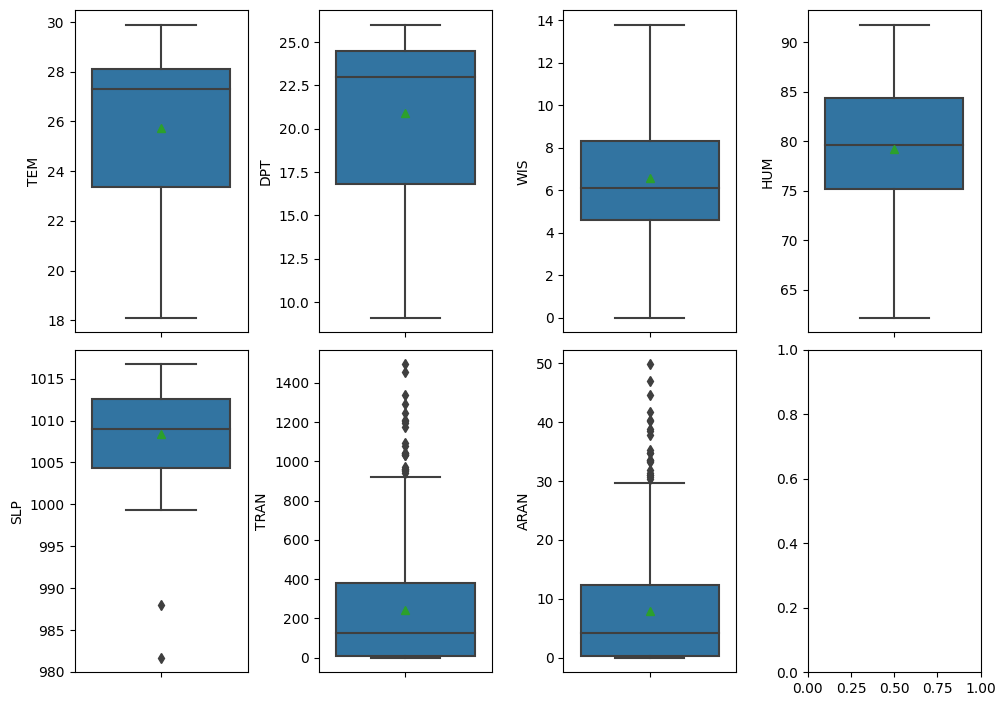

In [37]:
df_box=df.drop(['RAN','Period'],axis=1)
fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(10,7))
ax = ax.flatten()
index = 0
for i in df_box.columns:
  sns.boxplot(y=i, data=df_box, ax=ax[index],showmeans=True)
  index +=1
plt.tight_layout(pad=0.5)
plt.show()

<ipython-input-39-bf3b8f5217c0>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=axs[index],color='seagreen',kde_kws={'lw':3,'color':'purple'},bins=30)
<ipython-input-39-bf3b8f5217c0>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=axs[index],color='seagreen',kde_kws={'lw':3,'color'

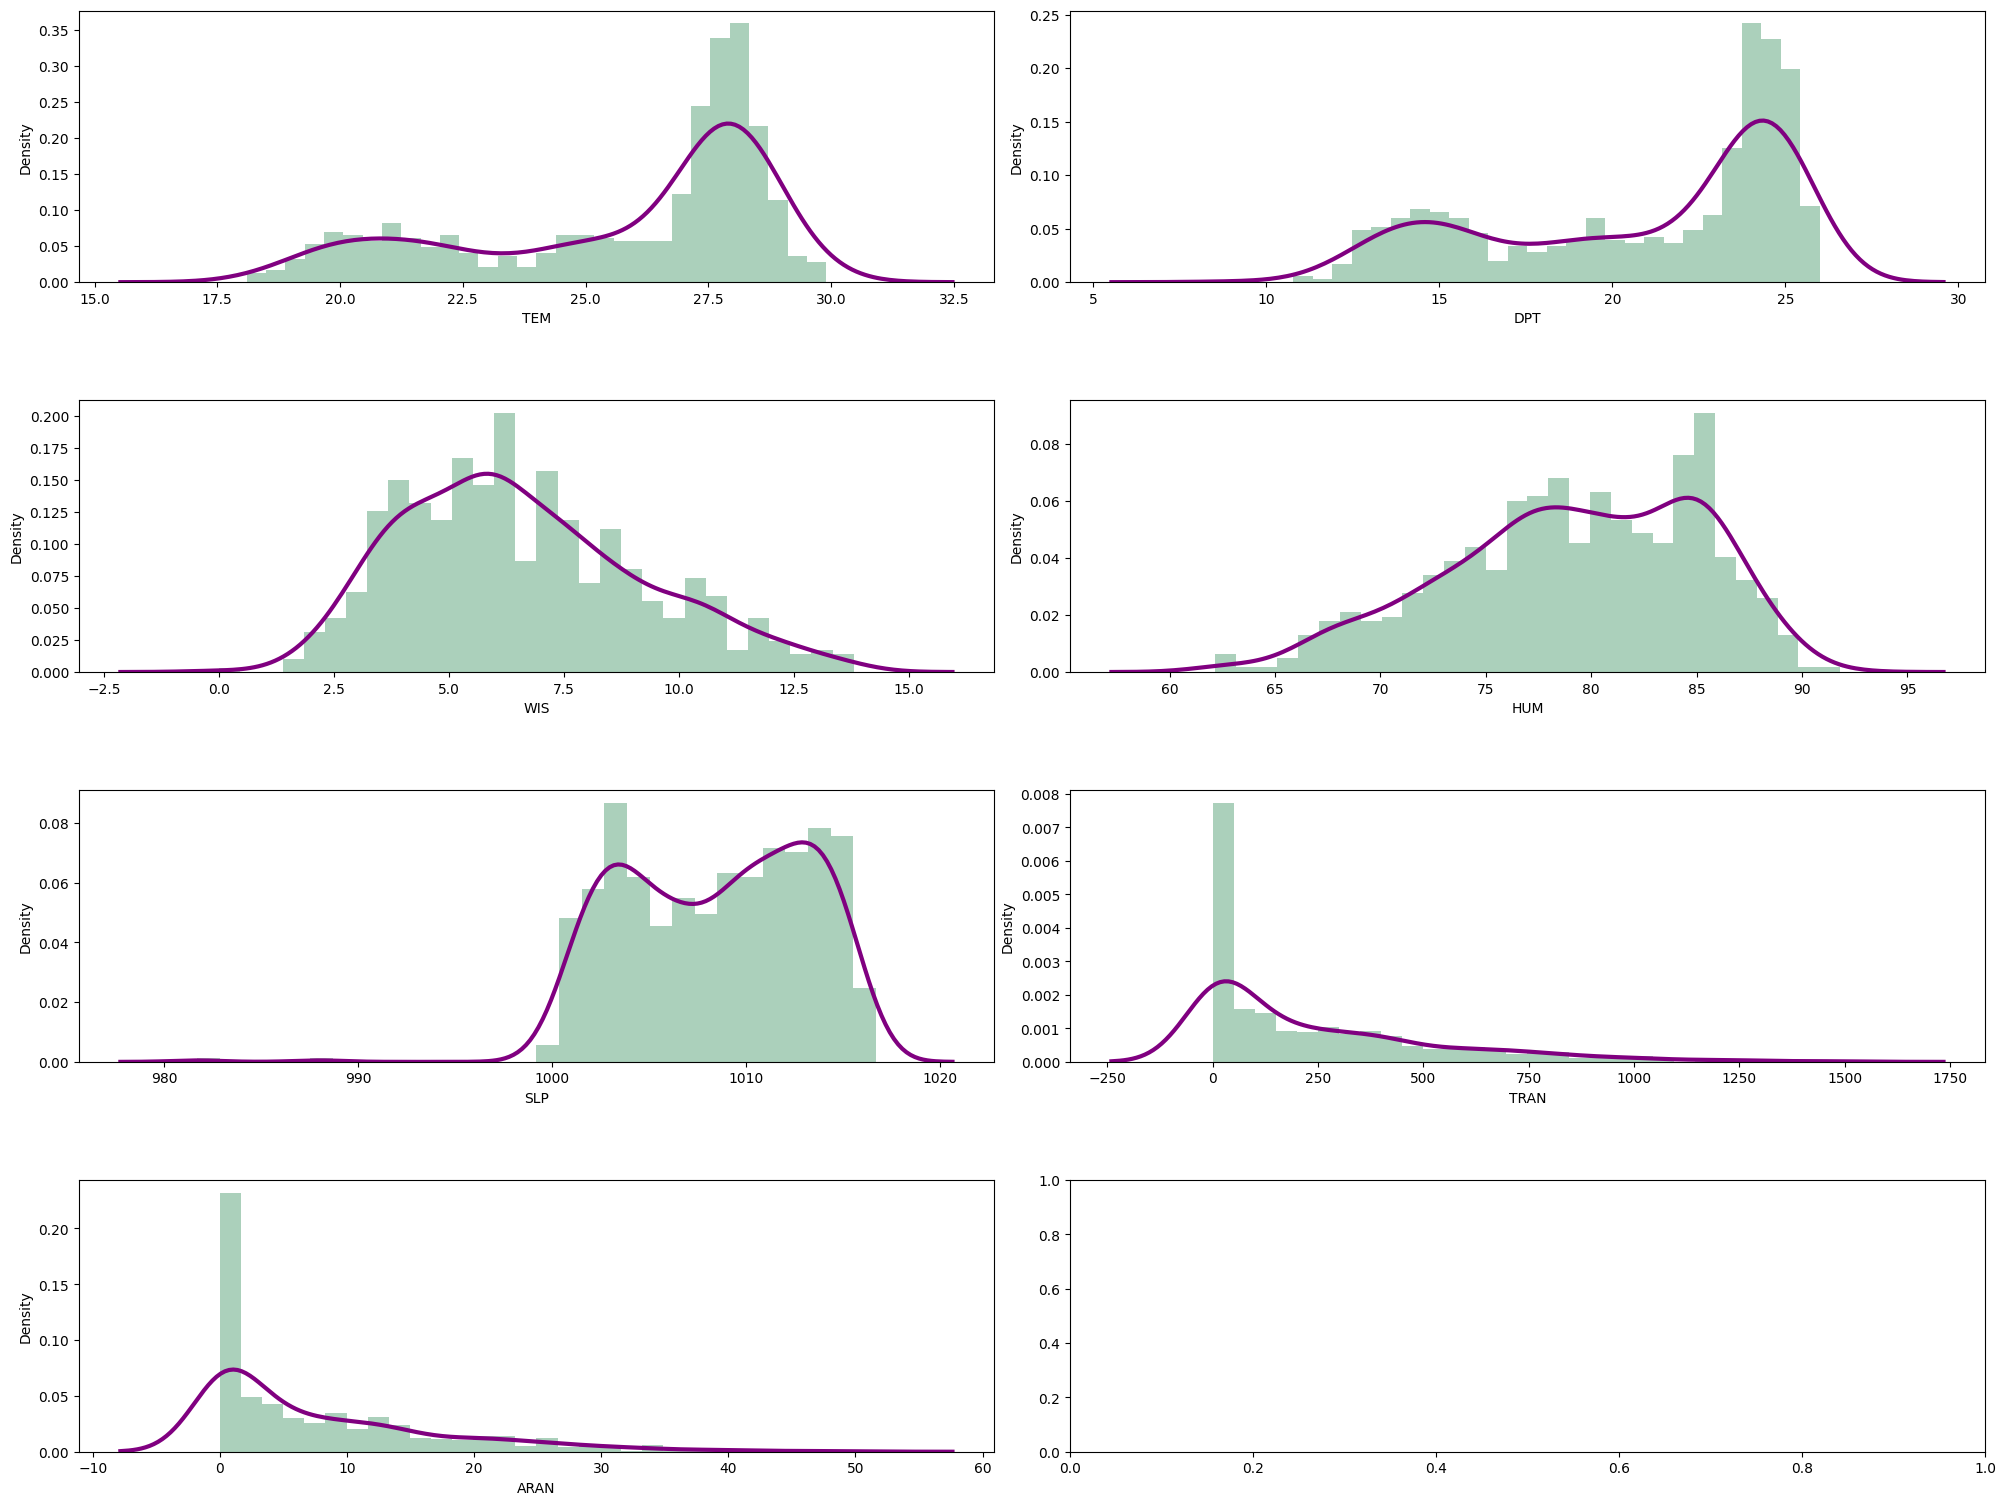

In [39]:
#Histogram of numerical_variables
df_dist=df.drop(['RAN','Period'],axis=1)
fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(20, 15))
index = 0
axs = axs.flatten()
for k,v in df_dist.items():
    sns.distplot(v, ax=axs[index],color='seagreen',kde_kws={'lw':3,'color':'purple'},bins=30)
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5.0)

<Axes: >

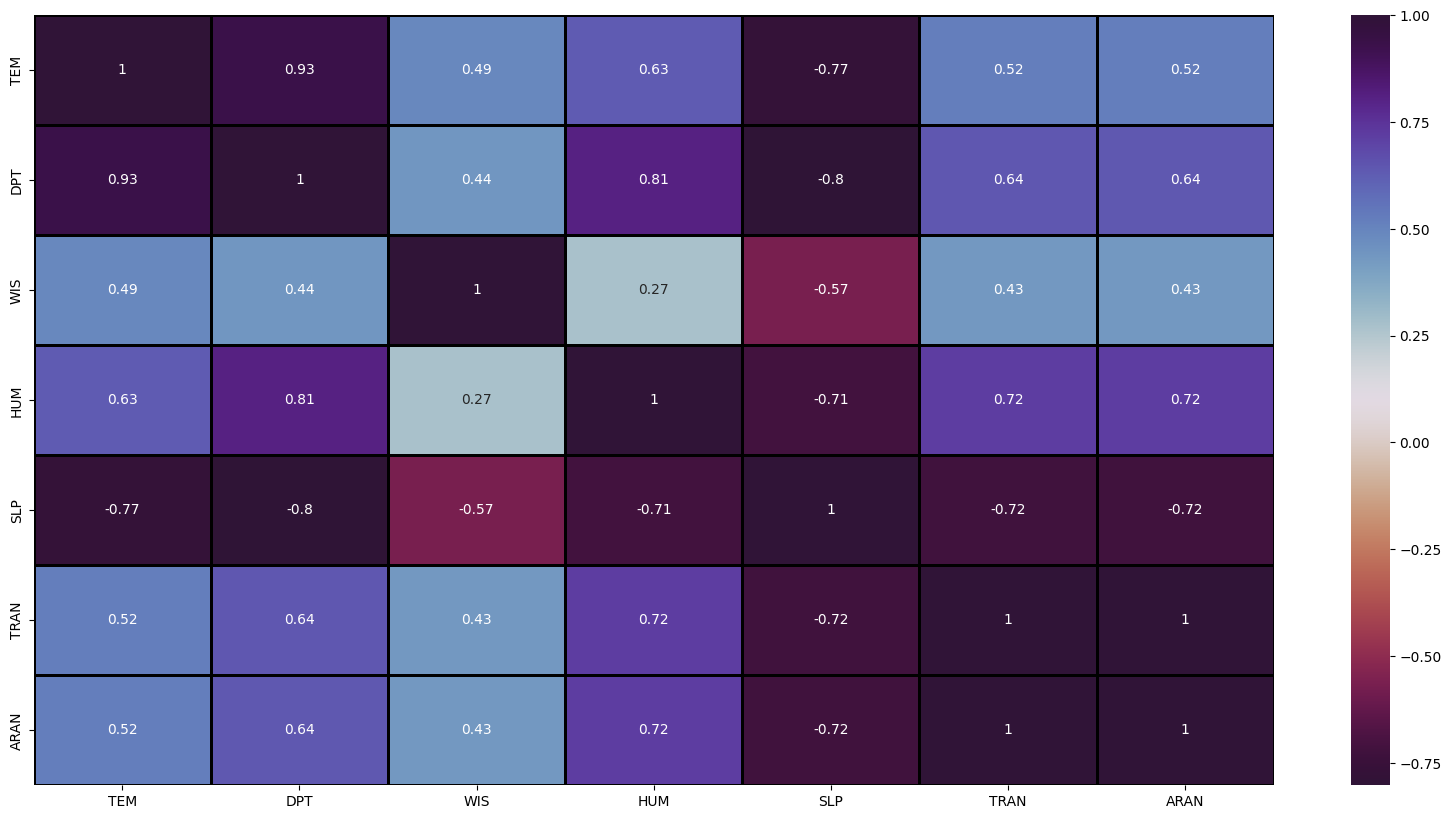

In [40]:
#Correaltion heatmap
df_corr=df.drop(['Period','RAN'],axis=1)
plt.figure(figsize=(20, 10))
sns.heatmap(df_corr.corr(),  annot=True,cmap='twilight_shifted_r',linewidth=2,linecolor='black')

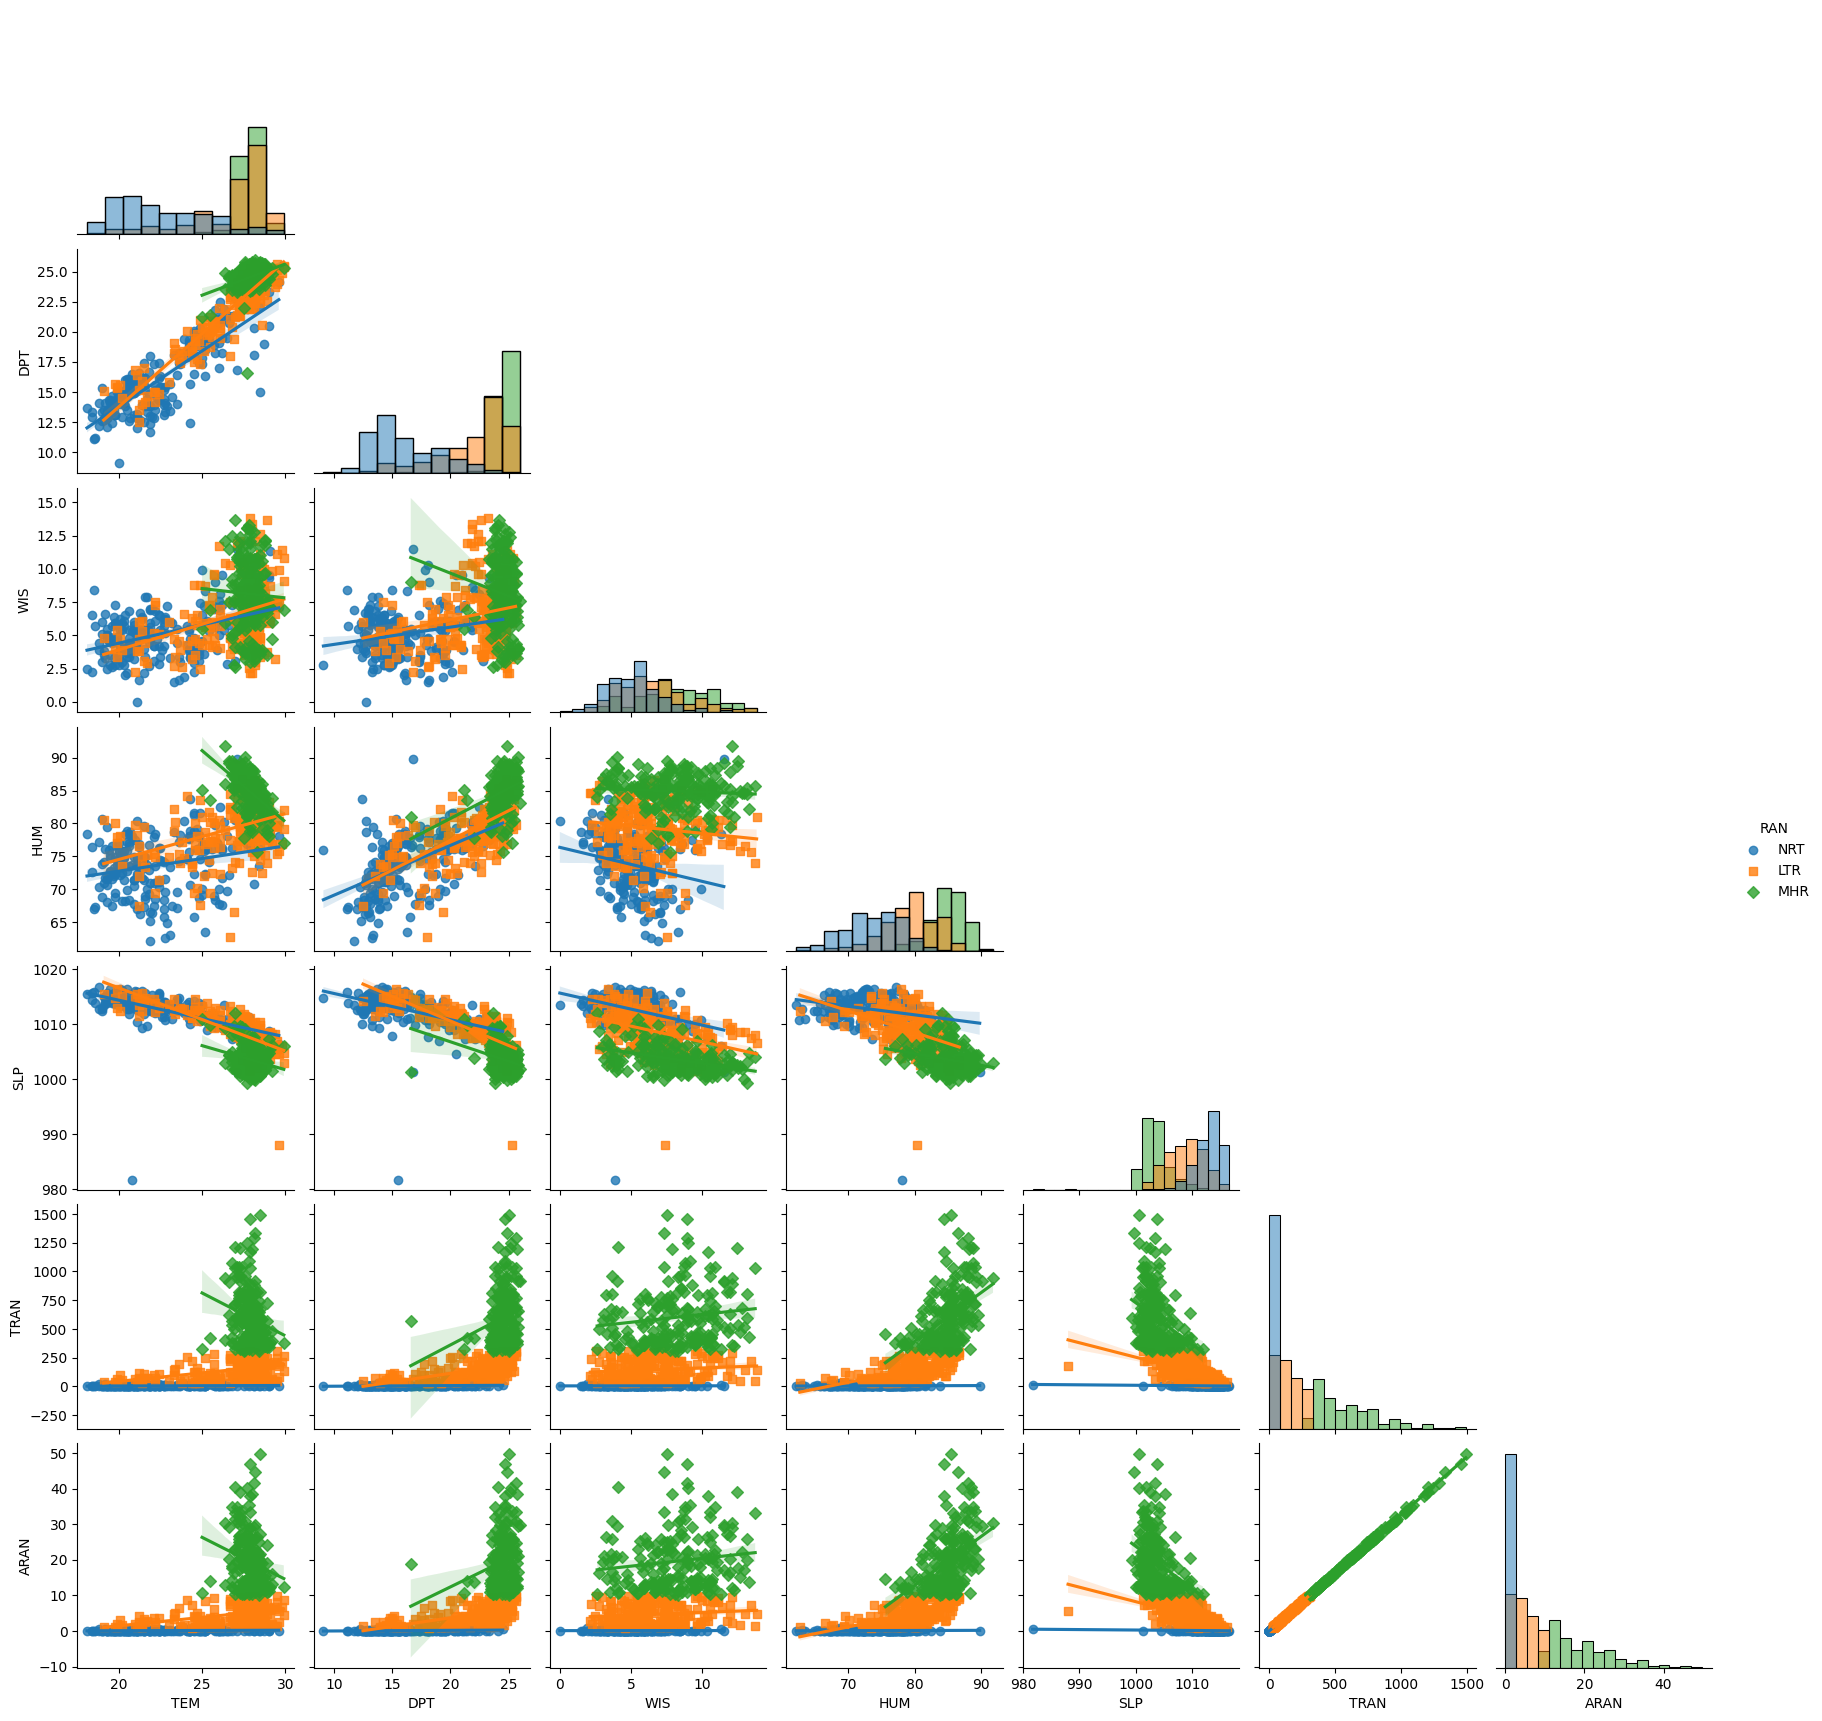

In [42]:
#Pairplot
sns.pairplot(df,hue='RAN',kind='reg',diag_kind='hist', markers=["o", "s", "D"],corner=True)

In [43]:
# Arrange data
df.set_index('Period',inplace=True)
df.index.year.value_counts().sort_values()

1964    12
1976    12
1966    12
1967    12
1968    12
1969    12
1970    12
1971    12
1972    12
1973    12
1974    12
1989    12
1975    12
1988    12
1978    12
1979    12
1980    12
1981    12
1982    12
1983    12
1984    12
1985    12
1986    12
1977    12
1990    12
1991    12
2014    12
1965    12
1992    12
1993    12
1994    12
1995    12
1996    12
1997    12
1998    12
1999    12
2000    12
2001    12
2002    12
2003    12
2004    12
2005    12
2006    12
2007    12
2008    12
2009    12
2010    12
2011    12
2012    12
2013    12
1987    12
2015    12
Name: Period, dtype: int64

In [54]:
train_df=df[df.index.year<2005]
test_df=df[df.index.year>=2005]

In [55]:
print(train_df.shape)
print(test_df.shape)

(492, 8)
(132, 8)


In [56]:
train_df.head()

,TEM,DPT,WIS,HUM,SLP,TRAN,ARAN,RAN
Period,,,,,,,,
1964-01-31,19.6,13.3,4.4,71.52,1014.6,3,0.10,NRT
1964-02-29,22.3,14.5,4.7,71.03,1013.0,3,0.10,NRT
1964-03-31,26.5,21.4,6.1,78.06,1010.9,0,0.00,NRT
1964-04-30,27.4,22.5,10.5,80.70,1007.7,198,6.60,LTR
1964-05-31,28.3,24.0,6.2,79.97,1004.6,195,6.29,LTR


In [60]:
test_df.head()

,TEM,DPT,WIS,HUM,SLP,TRAN,ARAN,RAN
Period,,,,,,,,
2005-01-31,19.5,14.3,2.74,74.76,1014.4,7,0.23,NRT
2005-02-28,23.1,15.7,3.27,73.33,1013.4,0,0.00,NRT
2005-03-31,26.1,19.5,4.07,79.66,1011.7,71,2.29,LTR
2005-04-30,28.2,22.9,3.41,78.06,1010.3,129,4.30,LTR
2005-05-31,28.7,24.7,3.56,79.26,1006.2,212,6.84,LTR


In [63]:
X_train=train_df.drop('RAN',axis=1)
X_test=test_df.drop('RAN',axis=1)
y_train=train_df.RAN
y_test=test_df.RAN

In [65]:
Standard_scaler = preprocessing.StandardScaler()
X_train_scaled = Standard_scaler.fit_transform(X_train)
X_test_scaled = Standard_scaler.fit_transform(X_test)
X_train_scaled,X_test_scaled

(array([[-1.9626718 , -1.72697776, -0.90508418, ...,  1.25406849,
         -0.81937515, -0.82197765],
        [-1.09022728, -1.4480306 , -0.79429523, ...,  0.9253625 ,
         -0.81937515, -0.82197765],
        [ 0.26690865,  0.15591559, -0.27728012, ...,  0.49393588,
         -0.82998484, -0.83283883],
        ...,
        [ 0.42847246,  0.69056432, -1.56243195, ...,  0.71992125,
          0.32647057,  0.31301629],
        [-0.76709967, -0.61118911, -1.97604404, ...,  1.06917137,
         -0.82644828, -0.82958048],
        [-1.44566764, -1.05285545, -1.9169566 , ...,  1.21298024,
         -0.82998484, -0.83283883]]),
 array([[-2.05558123e+00, -1.66401094e+00, -1.61394004e+00,
         -7.28447261e-01,  1.42664647e+00, -8.13101957e-01,
         -8.12247252e-01],
        [-9.06525588e-01, -1.33652508e+00, -1.29971288e+00,
         -9.53126920e-01,  1.19904515e+00, -8.35331924e-01,
         -8.34581016e-01],
        [ 5.10207786e-02, -4.47634891e-01, -8.25407732e-01,
          4.1434090

In [66]:
logmodel = LogisticRegression()
logmodel.fit(X_train_scaled, y_train)
y_pred = logmodel.predict(X_test_scaled)

In [68]:
print('############# Logistic Reg ###############')
print("Classification report:")
print(classification_report(y_test, y_pred))
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred,labels=['NRT', 'LTR','MHR']))
print("Accuracy score:")
print(accuracy_score(y_test, y_pred))

############# Logistic Reg ###############
Classification report:
              precision    recall  f1-score   support

         LTR       0.92      0.84      0.88        43
         MHR       1.00      0.93      0.96        44
         NRT       0.87      1.00      0.93        45

    accuracy                           0.92       132
   macro avg       0.93      0.92      0.92       132
weighted avg       0.93      0.92      0.92       132

Confusion matrix:
[[45  0  0]
 [ 7 36  0]
 [ 0  3 41]]
Accuracy score:
0.9242424242424242


In [72]:
TP, FP, FN, TN = confusion_matrix(y_test,y_pred ,labels=['LTR','MHR']).ravel()
TP, FP, FN, TN

(36, 0, 3, 41)

In [73]:
TP, FP, FN, TN = confusion_matrix(y_test,y_pred ,labels=['NRT','MHR']).ravel()
TP, FP, FN, TN

(45, 0, 0, 41)

In [79]:
Predictive_value_positive=(TP/(TP+FP))
Predictive_value_positive

1.0

In [80]:
Predictive_value_negative=(TN/(TN+FN))
Predictive_value_negative

1.0

In [81]:
Accuracy=((TP+TN)/(TP+TN+FP+FN))
Accuracy

1.0

In [82]:
Sensitivity= (TP/(TP+FN))
Sensitivity

1.0

In [83]:
Specificity = (TN/(TN+FP))
Specificity

1.0

In [85]:
##########DT#############
DTclf=tree.DecisionTreeClassifier()
DTclf.fit(X_train, y_train)
y_pred= DTclf.predict(X_test)

In [87]:
print('############# DT ###############')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred, labels=['NRT', 'LTR','MHR']))
print(accuracy_score(y_test, y_pred))

############# DT ###############
              precision    recall  f1-score   support

         LTR       1.00      1.00      1.00        43
         MHR       1.00      1.00      1.00        44
         NRT       1.00      1.00      1.00        45

    accuracy                           1.00       132
   macro avg       1.00      1.00      1.00       132
weighted avg       1.00      1.00      1.00       132

[[45  0  0]
 [ 0 43  0]
 [ 0  0 44]]
1.0


In [90]:
############RF###########
RFclf=RandomForestClassifier(n_estimators=101)
RFclf.fit(X_train, y_train)
y_pred=RFclf.predict(X_test)

In [92]:
print('############# RF ###############')
print("Classification report:")
print(classification_report(y_test, y_pred))
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred,labels=['NRT', 'LTR','MHR']))
print("Accuracy score:")
print(accuracy_score(y_test, y_pred))

############# RF ###############
Classification report:
              precision    recall  f1-score   support

         LTR       1.00      1.00      1.00        43
         MHR       1.00      1.00      1.00        44
         NRT       1.00      1.00      1.00        45

    accuracy                           1.00       132
   macro avg       1.00      1.00      1.00       132
weighted avg       1.00      1.00      1.00       132

Confusion matrix:
[[45  0  0]
 [ 0 43  0]
 [ 0  0 44]]
Accuracy score:
1.0


In [93]:
############SVM##########
SVclf = SVC(kernel='linear',probability=True, degree=3)
SVclf.fit(X_train, y_train)
y_pred=SVclf.predict(X_test)

In [97]:
print('############# SVM ###############')
print("Classification report:")
print(classification_report(y_test, y_pred))
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred,labels=['NRT', 'LTR']))
print("Accuracy score:")
print(accuracy_score(y_test, y_pred))

############# SVM ###############
Classification report:
              precision    recall  f1-score   support

         LTR       1.00      1.00      1.00        43
         MHR       1.00      1.00      1.00        44
         NRT       1.00      1.00      1.00        45

    accuracy                           1.00       132
   macro avg       1.00      1.00      1.00       132
weighted avg       1.00      1.00      1.00       132

Confusion matrix:
[[45  0]
 [ 0 43]]
Accuracy score:
1.0
